In [32]:
import transit_model as tm
import numpy as np
import matplotlib.pyplot as plt

In [33]:
n_passengers = 1000
node_cap_range = [20, 18, 16, 15]
replicates = 10

In [34]:
capacity_dict = {}

for n in node_cap_range:
    transit_times = []
    print(n)
    for r in range(replicates):
        print(r)
        g, passengers = tm.initialize(n_passengers=n_passengers,
                                      node_capacity=n)
        temp_transit_times = tm.update(g=g,
                                  passengers=passengers,
                                  max_run_steps=5e4)
        if len(temp_transit_times) == n_passengers:
            transit_times.append(np.mean(temp_transit_times))
        else:
            print(f'simulation with capacity of {n} is has only {len(temp_transit_times)}/{n_passengers} completed')
    capacity_dict[n] = transit_times

20
0
1
2
3
4
5
6
7
8
9
18
0
1
2
3
4
5
6
7
8
simulation with capacity of 18 is has only 900/1000 completed
9
16
0
1
simulation with capacity of 16 is has only 928/1000 completed
2
simulation with capacity of 16 is has only 901/1000 completed
3
4
5
6
7
8
9
15
0
simulation with capacity of 15 is has only 958/1000 completed
1
simulation with capacity of 15 is has only 256/1000 completed
2
simulation with capacity of 15 is has only 926/1000 completed
3
simulation with capacity of 15 is has only 779/1000 completed
4
simulation with capacity of 15 is has only 900/1000 completed
5
simulation with capacity of 15 is has only 273/1000 completed
6
simulation with capacity of 15 is has only 882/1000 completed
7
simulation with capacity of 15 is has only 834/1000 completed
8
9
simulation with capacity of 15 is has only 917/1000 completed


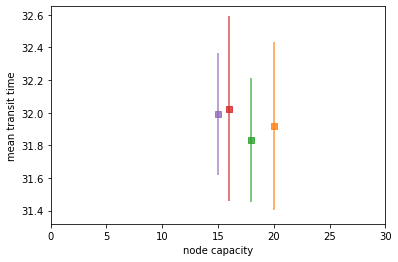

In [31]:
plt.figure()
for key in capacity_dict:
    transit_times = capacity_dict[key]
#     plt.scatter([key]*len(transit_times), transit_times, alpha=0.5)
    plt.errorbar(x=key, y=np.mean(transit_times), yerr=np.std(transit_times), fmt='s', alpha=0.8)

plt.xlim(0,30)
plt.xlabel('node capacity')
plt.ylabel('mean transit time')
plt.show()